<h1> HW2

<h3> Prob 1.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
N, p = 30, 20
np.random.seed(0)
X = np.random.randn(N,p)
Y = 2* np.random.randint (2, size = N) - 1

In [3]:
print(X.shape, Y.shape)

(30, 20) (30,)


In [4]:
theta_1 = np.random.randn(p)
theta_1

array([ 0.75982372, -0.28299435, -0.65599418,  1.2421285 , -1.46855646,
        0.84506705, -0.58419047, -0.53000237,  1.48760981, -0.58825482,
       -1.40026191,  3.05732433,  0.32554003,  0.38512974,  0.34404156,
       -1.10931502,  0.34205751, -0.57688712,  1.13274122,  0.4991662 ])

We randomly initialize a vector theta in $R^p$, and here we initialize with a standard normal distribution.

In [5]:
def loss_1(theta, X, Y):
    return np.mean(np.log(1 + np.exp(-Y * X.dot(theta))))

The loss function is defined as the logistic regression loss, and this is used to track the loss diminishing as the training is being done.

In [6]:
def sgd_1(X, Y, theta, alpha, T):
    for t in range(T):
        i = np.random.randint(N)
        theta = theta - alpha * (-Y[i] * X[i] * np.exp(-Y[i] * np.dot(X[i], theta))/ (1 + np.exp(-Y[i] * np.dot(X[i], theta))))
        loss = loss_1(theta, X, Y)
        plt.plot(t, loss, 'ro', markersize=1)
    return theta

SGD is being performed, and the index is selected randomly every iteration. The gradient of the loss function is being computed as above, and used as the unbiased estimate of the gradient.

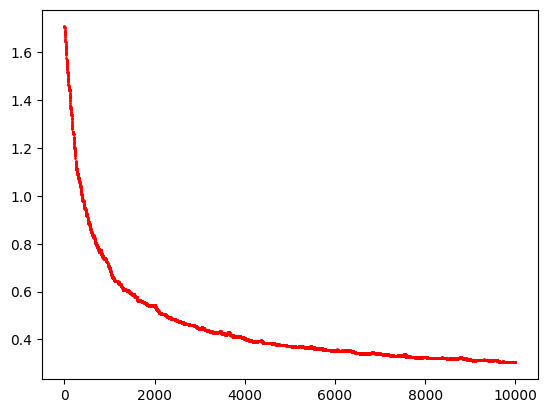

[ 0.05578929  0.0165044  -0.1738159   1.00271921 -0.48274295 -0.13770402
 -1.07136523 -0.7239623   0.98191269  0.06489932  0.68757529 -1.32805148
  0.27429077 -1.06579479  1.30097823  0.89702244 -0.69776794 -0.43953047
 -0.3116322  -2.05693624]


In [7]:
theta_hat_1 = sgd_1(X, Y, theta_1, 0.01, 10000)
plt.show()
print(theta_hat_1)

We can check the loss converging after significant amount of iterations. No train-test split was used because we have generated the data from a random distribution.

In [8]:
print(theta_hat_1)

[ 0.05578929  0.0165044  -0.1738159   1.00271921 -0.48274295 -0.13770402
 -1.07136523 -0.7239623   0.98191269  0.06489932  0.68757529 -1.32805148
  0.27429077 -1.06579479  1.30097823  0.89702244 -0.69776794 -0.43953047
 -0.3116322  -2.05693624]


<h3> Prob 2.

In [9]:
lambda_ = 0.1
theta_2 = np.random.randn(p)

Theta is initialized to be a random length p vector from a standard Gaussian distribution

In [10]:
#SVM loss
def loss_2(theta, X, Y, lambda_):
    return np.mean(np.maximum(0, 1 - Y * X.dot(theta))) + lambda_ * np.linalg.norm(theta)**2

In [11]:
def sgd_2(X, Y, theta, alpha, T):
    for t in range(T):
        i = np.random.randint(N)
        if Y[i] * X[i].dot(theta) < 1:
            theta = theta + alpha * Y[i] * X[i] - 2 * lambda_ * theta
        else:
            theta = theta - 2 * lambda_ * theta
        loss = loss_2(theta, X, Y, lambda_)
        plt.plot(t, loss, 'ro', markersize=1)
    return theta

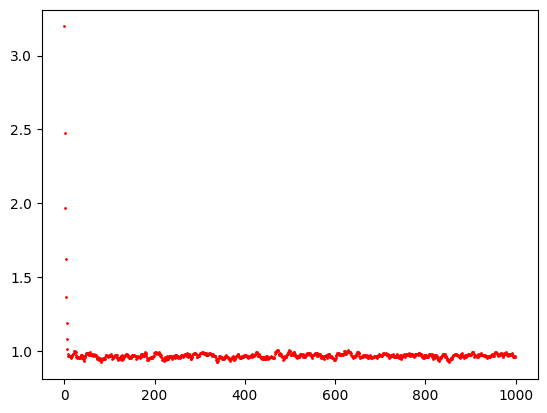

In [12]:
theta_hat_2 = sgd_2(X, Y, theta_2, 0.01, 1000)

The loss function is defined in order to track the loss decreasing, and the sgd is implemented for that loss, and it is implemented differently based on the sign $1-Y_iX_i^T\theta$. Also, there is one point in the loss function that is not differentiable, but since it is measure 0 and the gradient is just designed to just use the right side derivative, it doesn't make a problem

In [13]:
print(theta_hat_2)

[-0.00435876  0.02262282 -0.03342013  0.00145606  0.01009688 -0.03136455
  0.01406004 -0.00648436 -0.00878183 -0.02088144  0.00619744 -0.02120506
  0.0248482   0.00077593  0.0147673   0.011188   -0.01305558 -0.02470631
 -0.03727622 -0.01118254]


<h3> 

<h3> Prob3.

In [14]:
N = 30
np.random.seed(0)
X = np.random.randn(2,N)
y = np.sign(X[0, :]**2 + X[1, :]**2 - 0.7)
theta = 0.5
c, s = np.cos(theta), np.sin(theta)
X = np.array([[c, -s], [s, c]])@X
X = X + np.array([[1],[1]])

In [15]:
print(X.shape, y.shape)

(2, 30) (30,)


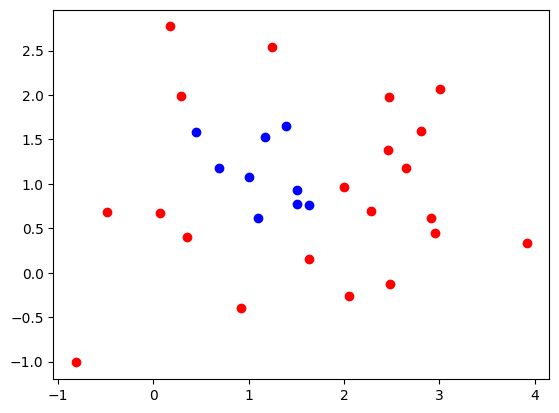

In [16]:
for i in range(N):
    if y[i] == 1:
        plt.plot(X[0,i], X[1,i], 'ro')
    else:
        plt.plot(X[0,i], X[1,i], 'bo')

X is visualized such that the red dots denote the points where Y is 1, and the blue dots denote the points where Y is -1. We can see that no linear line exists that seperate them

In [17]:
phi_X = np.array([np.ones(N), X[0,:], X[0,:]**2, X[1,:], X[1,:]**2])

The $\phi$ function is applied to the columns of X, which are a vector in $R^2$. This transformation embedds the points in $R^2$ to a high dimensional space $R^5$

In [18]:
print(phi_X.shape)

(5, 30)


In [19]:
w = np.random.randn(5)

w is the weight vector of the logistic regression which we will perform on the transformed data $\phi(X)$

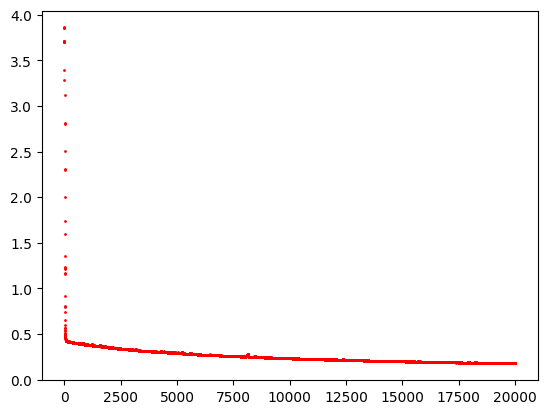

In [20]:
w = sgd_1(phi_X.T, y, w, 0.01, 20000)

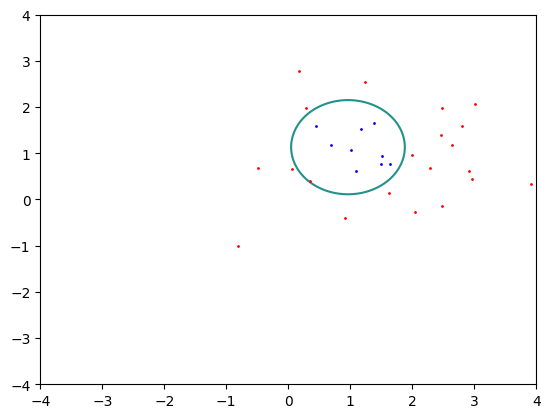

In [21]:
xx = np.linspace(-4, 4, 1024)
yy = np.linspace(-4, 4, 1024)
xx, yy = np.meshgrid(xx , yy)
Z = w[0] + (w[1] * xx + w[2] * xx**2) + (w[3] * yy + w[4] * yy**2)
plt.contour(xx , yy , Z, 0)
for i in range(N):
    if y[i] == 1:
        plt.plot(X[0,i], X[1,i], 'ro', markersize=1)
    else:
        plt.plot(X[0,i], X[1,i], 'bo', markersize=1)

plt.show()

The decision boundary of the logistic regression is where the output is 0. Therefore the decision boundary is given with the green line as implemented above. Now we can see that the red dots and the blue dots are seperable even we used a linear layer. 

<h3> Prob 7.

In [22]:
def f_true(x) :
    return (x-2)*np.cos(x*4)

def sigmoid(x) :
    return 1 / (1 + np.exp(-x))

def sigmoid_prime(x) :
    return sigmoid(x) * (1 - sigmoid(x))

In [23]:
K = 10000
alpha = 0.007
N, p = 30, 50
np.random.seed(0)
a0 = np.random.normal(loc = 0.0, scale = 4.0, size = p)
b0 = np.random.normal(loc = 0.0, scale = 4.0, size = p)
u0 = np.random.normal(loc = 0, scale = 0.05, size = p)
theta = np.concatenate((a0,b0,u0))

In [24]:
X = np.random.normal(loc = 0.0, scale = 1.0, size = N)
Y = f_true(X)

In [25]:
def f_th(theta, x) :
    return np.sum(theta[2*p : 3*p] * sigmoid(theta[0 : p] * np.reshape(x,(-1,1)) + theta[p : 2*p]), axis=1)

def diff_f_th(theta, x) :
    diff_f_u = sigmoid(theta[0 : p] * np.reshape(x,(-1,1)) + theta[p : 2*p])
    diff_f_b = theta[2*p : 3*p] * sigmoid_prime(theta[0 : p] * np.reshape(x,(-1,1)) + theta[p : 2*p])
    diff_f_a = diff_f_b * np.reshape(x,(-1,1))
    
    return np.concatenate((diff_f_a, diff_f_b, diff_f_u), axis=1)
    

The gradient of $f_\theta$ respect to $\theta$ is implemented as above, which was shown in Prob 6.

In [26]:
def loss(theta, X, Y) :
    return 0.5 * (f_th(theta, X) - Y)**2
def grad_loss(theta, X, Y) :
    return diff_f_th(theta, X).T @ (f_th(theta, X) - Y)

Also note that the gradient and the all of the forward and backward methods are implemented to work with batches using the np.reshape method. (We didn't use it anyway)

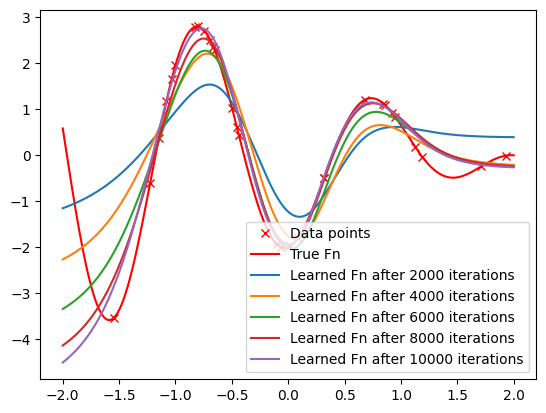

In [27]:
xx = np.linspace(-2,2,1024)
plt.plot(X,f_true(X),'rx',label='Data points')
plt.plot(xx,f_true(xx),'r',label='True Fn')

for k in range(K) :
    i = np.random.randint(N)
    theta = theta - alpha * grad_loss(theta, X[i], Y[i])
    if (k+1)%2000 == 0 :
        plt.plot(xx,f_th(theta, xx),label=f'Learned Fn after {k+1} iterations')

plt.legend()
plt.show()

We can observe that as the number of iteratios increase, the nerual network is well representing the true function in the points that are sampled randomly. It doesn't well represent the true function where the data points are not sampled.